In [1]:
!pip install optuna
!pip3 install transformers
!pip install SentencePiece
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 5.3 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=b21afa95dedbcbcc019b30fc5c47cad9089a75fe8924fba14e6c6682c6f88f24
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [2]:
import tensorflow as tf

# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.62.252.146:8470
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.62.252.146:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.62.252.146:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [3]:
import pandas as pd
import numpy as np
import re
from transformers import *
import random

In [4]:
# train
!gdown --id 1lct2GyNPE2UwI8geGXRha6j1yU8tksSw

# valid
!gdown --id 13wDQLk8mXorxghxWFNfhWvXPWPPI27dL

# test
!gdown --id 1St87-nfaqT5ZyiaDRY_NPy8PbRdTEPAY

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1lct2GyNPE2UwI8geGXRha6j1yU8tksSw
To: /content/train.csv
100% 20.1M/20.1M [00:00<00:00, 123MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=13wDQLk8mXorxghxWFNfhWvXPWPPI27dL
To: /content/valid.csv
100% 1.87M/1.87M [00:00<00:00, 63.4MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://

In [5]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')
test = pd.read_csv('test.csv')

In [6]:
MODEL_NAME = 'bert-base-uncased'
MAX_LEN = 64

In [7]:
def prepare_dataset(data, tokenizer, max_len):

  ids = []
  masks = []
  labels = []
  token_ids = []

  labels = []
  
  for row in data.itertuples():
    text = row.Input + ' [SEP] ' + row.Output
    inputs = tokenizer(text, None, max_length=max_len, padding='max_length', truncation=True, return_attention_mask=True, return_token_type_ids=True, add_special_tokens=True)
    ids.append(inputs['input_ids'])
    masks.append(inputs['attention_mask'])
    token_ids.append(inputs['token_type_ids'])

    labels.append(row.Label)

  return {
      'input_ids': ids,
      'attention_mask': masks,
      'token_type_ids': token_ids,
      'labels': labels
      }

In [8]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

training_set = prepare_dataset(train, tokenizer, MAX_LEN)
validating_set = prepare_dataset(valid, tokenizer, MAX_LEN)
testting_set = prepare_dataset(test, tokenizer, MAX_LEN)

https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpktk9luof


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
creating metadata file for /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
https://huggingface.co/bert-base-uncased/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp2p6vpla6


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
creating metadata file for /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "h

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
creating metadata file for /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpv3k8v0d2


Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
creating metadata file for /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://hugg

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import * 
from tensorflow.keras import optimizers, losses, layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

In [10]:
def get_model(MAX_LEN, MODEL_NAME):

  input_ids = Input(shape=(MAX_LEN,), dtype=tf.int32)
  attention_mask = Input(shape=(MAX_LEN,), dtype=tf.int32)
  token_type_ids = Input(shape=(MAX_LEN,), dtype=tf.int32)
    
  encoder = TFAutoModel.from_pretrained(MODEL_NAME, return_dict=True)

  pooler_outputs = encoder({"input_ids": input_ids, "token_type_ids": token_type_ids, "attention_mask": attention_mask}, training=True).pooler_output

  dense_layer = Dense(256, activation='relu', name='dense_layer1')(pooler_outputs)
  dropout = Dropout(0.25)(dense_layer)
  output = Dense(1, activation='sigmoid')(dropout)
    
  model = Model(inputs=[input_ids, attention_mask, token_type_ids], outputs=output)

  optimizer = optimizers.Adam(lr=2e-5)
  loss = losses.binary_crossentropy

  model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
  
  return model

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.19.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

https://huggingface.co/bert-base-uncased/resolve/main/tf_model.h

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/tf_model.h5 in cache at /root/.cache/huggingface/transformers/775efbdc2152093295bc5824dee96da82a5f3c1f218dfface1b8cef3094bdf8f.c719a806caef7d36ec0185f14b3b5fa727d919f924abe35622b4b7147bfbb8c7.h5
creating metadata file for /root/.cache/huggingface/transformers/775efbdc2152093295bc5824dee96da82a5f3c1f218dfface1b8cef3094bdf8f.c719a806caef7d36ec0185f14b3b5fa727d919f924abe35622b4b7147bfbb8c7.h5
loading weights file https://huggingface.co/bert-base-uncased/resolve/main/tf_model.h5 from cache at /root/.cache/huggingface/transformers/775efbdc2152093295bc5824dee96da82a5f3c1f218dfface1b8cef3094bdf8f.c719a806caef7d36ec0185f14b3b5fa727d919f924abe35622b4b7147bfbb8c7.h5
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_2[0][0]',                
                                thPoolingAndCrossAt               'input_1[0][0]',            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


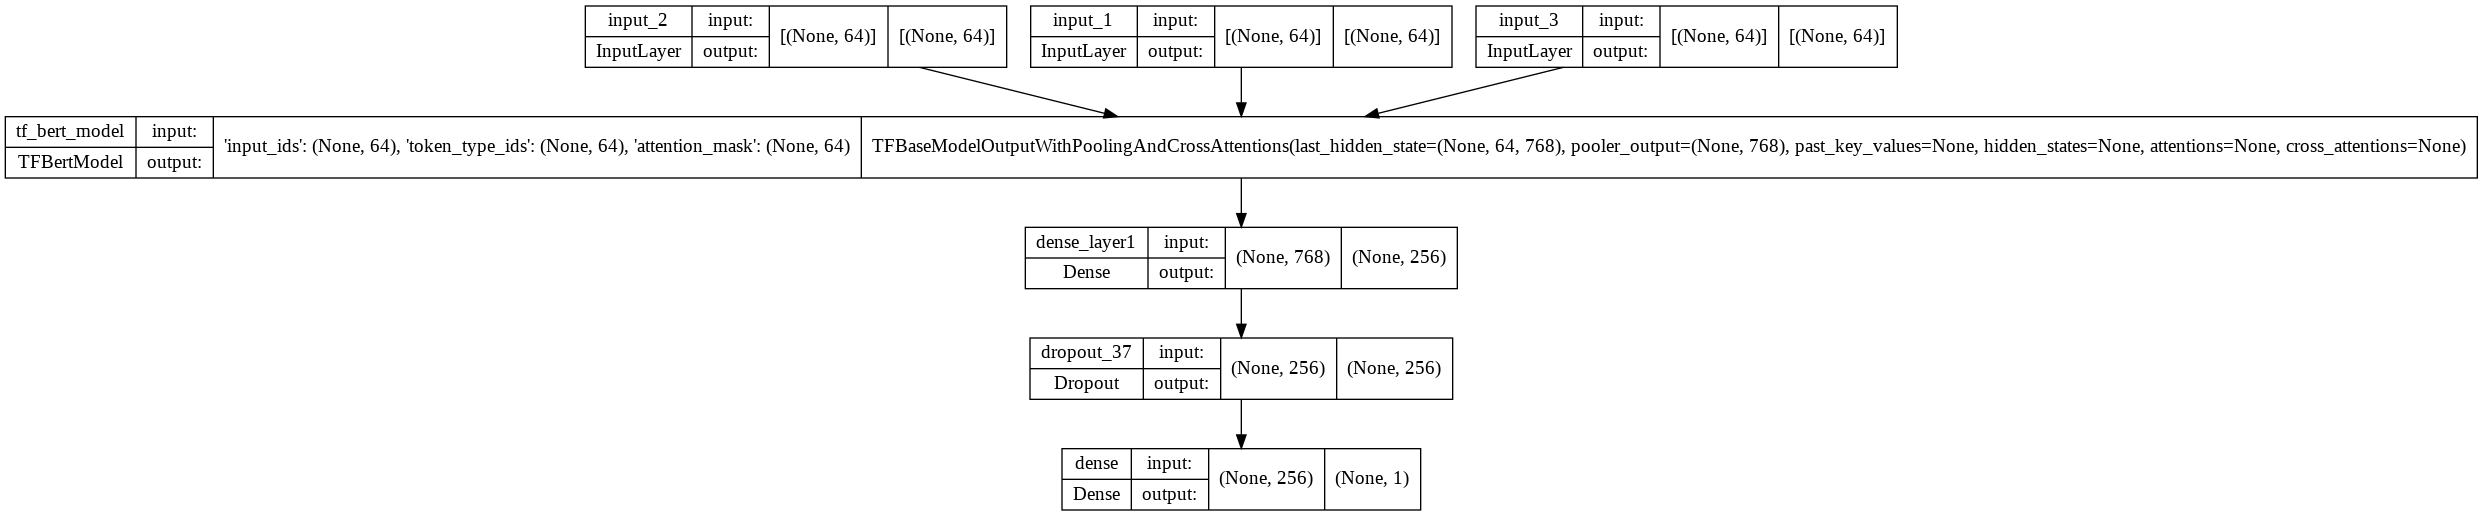

In [11]:
with strategy.scope():
  model = get_model(MAX_LEN, MODEL_NAME)

model.summary()

tf.keras.utils.plot_model(model, to_file='./model.png', show_shapes=True)

In [12]:
x_train = [np.array(training_set['input_ids'], dtype=int), np.array(training_set['attention_mask'], dtype=int), np.array(training_set['token_type_ids'], dtype=int)]
x_valid = [np.array(validating_set['input_ids'], dtype=int), np.array(validating_set['attention_mask'], dtype=int), np.array(validating_set['token_type_ids'], dtype=int)]
x_test = [np.array(testting_set['input_ids'], dtype=int), np.array(testting_set['attention_mask'], dtype=int), np.array(testting_set['token_type_ids'], dtype=int)]

y_train = train.Label
y_valid = valid.Label
y_test = test.Label

In [13]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_valid, y_valid),
    epochs=3,
    verbose=1,
    batch_size=32)

Epoch 1/3
4754/4754 [==============================] - 484s 84ms/step - loss: 0.3345 - accuracy: 0.8459 - val_loss: 0.2887 - val_accuracy: 0.8734
Epoch 2/3
4754/4754 [==============================] - 343s 72ms/step - loss: 0.1974 - accuracy: 0.9174 - val_loss: 0.2982 - val_accuracy: 0.8783
Epoch 3/3
4754/4754 [==============================] - 342s 72ms/step - loss: 0.1182 - accuracy: 0.9519 - val_loss: 0.3475 - val_accuracy: 0.8795


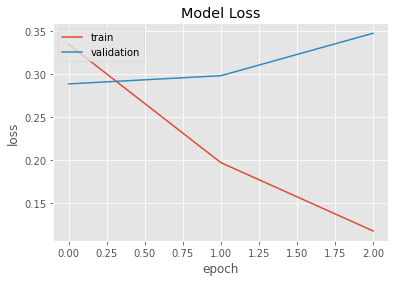

In [14]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

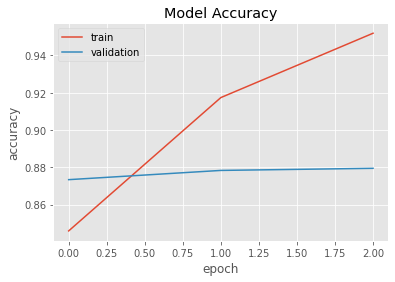

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
predictions = model.predict(x_test)

In [17]:
import optuna

def objective(trial):

  sig_threshold = trial.suggest_float("sig_threshold", 0.0, 1.0)
  print("sig_threshold", sig_threshold)

  pred_labels = [1 if predictions[i] > sig_threshold else 0 for i in range(len(testting_set['labels']))]

  acc = accuracy_score(testting_set['labels'], pred_labels)
  print("acc", acc)

  return acc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2022-06-09 14:22:04,029] A new study created in memory with name: no-name-7646cca7-a644-4ace-900b-c7302165ee9e
[I 2022-06-09 14:22:04,077] Trial 0 finished with value: 0.8722551928783383 and parameters: {'sig_threshold': 0.13442226017031023}. Best is trial 0 with value: 0.8722551928783383.
[I 2022-06-09 14:22:04,112] Trial 1 finished with value: 0.8638724035608308 and parameters: {'sig_threshold': 0.8961254741636465}. Best is trial 0 with value: 0.8722551928783383.
[I 2022-06-09 14:22:04,152] Trial 2 finished with value: 0.7986646884272997 and parameters: {'sig_threshold': 0.9848066344809433}. Best is trial 0 with value: 0.8722551928783383.
[I 2022-06-09 14:22:04,192] Trial 3 finished with value: 0.885459940652819 and parameters: {'sig_threshold': 0.3709647178130703}. Best is trial 3 with value: 0.885459940652819.
[I 2022-06-09 14:22:04,235] Trial 4 finished with value: 0.8830860534124629 and parameters: {'sig_threshold': 0.24676628819805602}. Best is trial 3 with value: 0.885459940

sig_threshold 0.13442226017031023
acc 0.8722551928783383
sig_threshold 0.8961254741636465
acc 0.8638724035608308
sig_threshold 0.9848066344809433
acc 0.7986646884272997
sig_threshold 0.3709647178130703
acc 0.885459940652819
sig_threshold 0.24676628819805602
acc 0.8830860534124629
sig_threshold 0.038406536960343796


[I 2022-06-09 14:22:04,280] Trial 5 finished with value: 0.8365727002967359 and parameters: {'sig_threshold': 0.038406536960343796}. Best is trial 3 with value: 0.885459940652819.
[I 2022-06-09 14:22:04,319] Trial 6 finished with value: 0.8729970326409495 and parameters: {'sig_threshold': 0.8289413030761287}. Best is trial 3 with value: 0.885459940652819.
[I 2022-06-09 14:22:04,360] Trial 7 finished with value: 0.8850890207715133 and parameters: {'sig_threshold': 0.35759793081385394}. Best is trial 3 with value: 0.885459940652819.
[I 2022-06-09 14:22:04,401] Trial 8 finished with value: 0.8779673590504451 and parameters: {'sig_threshold': 0.16398836576688625}. Best is trial 3 with value: 0.885459940652819.
[I 2022-06-09 14:22:04,439] Trial 9 finished with value: 0.8819732937685459 and parameters: {'sig_threshold': 0.696878870807618}. Best is trial 3 with value: 0.885459940652819.


acc 0.8365727002967359
sig_threshold 0.8289413030761287
acc 0.8729970326409495
sig_threshold 0.35759793081385394
acc 0.8850890207715133
sig_threshold 0.16398836576688625
acc 0.8779673590504451
sig_threshold 0.696878870807618
acc 0.8819732937685459
sig_threshold 0.5472669616000352


[I 2022-06-09 14:22:04,484] Trial 10 finished with value: 0.8853115727002967 and parameters: {'sig_threshold': 0.5472669616000352}. Best is trial 3 with value: 0.885459940652819.
[I 2022-06-09 14:22:04,539] Trial 11 finished with value: 0.8852373887240356 and parameters: {'sig_threshold': 0.5354744646461085}. Best is trial 3 with value: 0.885459940652819.
[I 2022-06-09 14:22:04,578] Trial 12 finished with value: 0.8844955489614243 and parameters: {'sig_threshold': 0.5051058373280873}. Best is trial 3 with value: 0.885459940652819.
[I 2022-06-09 14:22:04,617] Trial 13 finished with value: 0.8856824925816024 and parameters: {'sig_threshold': 0.37521864800041577}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:04,657] Trial 14 finished with value: 0.8850890207715133 and parameters: {'sig_threshold': 0.3307766139724562}. Best is trial 13 with value: 0.8856824925816024.


acc 0.8853115727002967
sig_threshold 0.5354744646461085
acc 0.8852373887240356
sig_threshold 0.5051058373280873
acc 0.8844955489614243
sig_threshold 0.37521864800041577
acc 0.8856824925816024
sig_threshold 0.3307766139724562
acc 0.8850890207715133
sig_threshold 0.4371667477523688


[I 2022-06-09 14:22:04,699] Trial 15 finished with value: 0.8849406528189911 and parameters: {'sig_threshold': 0.4371667477523688}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:04,741] Trial 16 finished with value: 0.8829376854599407 and parameters: {'sig_threshold': 0.6842699835492496}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:04,781] Trial 17 finished with value: 0.8850890207715133 and parameters: {'sig_threshold': 0.35941675498436065}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:04,822] Trial 18 finished with value: 0.8830118694362018 and parameters: {'sig_threshold': 0.6838145085993425}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:04,863] Trial 19 finished with value: 0.8830118694362018 and parameters: {'sig_threshold': 0.2411457664336907}. Best is trial 13 with value: 0.8856824925816024.


acc 0.8849406528189911
sig_threshold 0.6842699835492496
acc 0.8829376854599407
sig_threshold 0.35941675498436065
acc 0.8850890207715133
sig_threshold 0.6838145085993425
acc 0.8830118694362018
sig_threshold 0.2411457664336907
acc 0.8830118694362018
sig_threshold 0.015013010459696108


[I 2022-06-09 14:22:04,908] Trial 20 finished with value: 0.8037091988130564 and parameters: {'sig_threshold': 0.015013010459696108}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:04,950] Trial 21 finished with value: 0.8850148367952523 and parameters: {'sig_threshold': 0.5800606179341636}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:04,990] Trial 22 finished with value: 0.8853115727002967 and parameters: {'sig_threshold': 0.44419301841292824}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,030] Trial 23 finished with value: 0.8850890207715133 and parameters: {'sig_threshold': 0.4158057421857169}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,082] Trial 24 finished with value: 0.884272997032641 and parameters: {'sig_threshold': 0.2705501157080104}. Best is trial 13 with value: 0.8856824925816024.


acc 0.8037091988130564
sig_threshold 0.5800606179341636
acc 0.8850148367952523
sig_threshold 0.44419301841292824
acc 0.8853115727002967
sig_threshold 0.4158057421857169
acc 0.8850890207715133
sig_threshold 0.2705501157080104
acc 0.884272997032641
sig_threshold 0.40570206540014037


[I 2022-06-09 14:22:05,122] Trial 25 finished with value: 0.8856083086053412 and parameters: {'sig_threshold': 0.40570206540014037}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,169] Trial 26 finished with value: 0.8789317507418397 and parameters: {'sig_threshold': 0.18881739712065526}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,209] Trial 27 finished with value: 0.8841246290801187 and parameters: {'sig_threshold': 0.6368546914653782}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,248] Trial 28 finished with value: 0.8847922848664689 and parameters: {'sig_threshold': 0.30880163377625425}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,288] Trial 29 finished with value: 0.8708456973293769 and parameters: {'sig_threshold': 0.12144589708861031}. Best is trial 13 with value: 0.8856824925816024.


acc 0.8856083086053412
sig_threshold 0.18881739712065526
acc 0.8789317507418397
sig_threshold 0.6368546914653782
acc 0.8841246290801187
sig_threshold 0.30880163377625425
acc 0.8847922848664689
sig_threshold 0.12144589708861031
acc 0.8708456973293769
sig_threshold 0.4113599442397664


[I 2022-06-09 14:22:05,336] Trial 30 finished with value: 0.8852373887240356 and parameters: {'sig_threshold': 0.4113599442397664}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,376] Trial 31 finished with value: 0.8853857566765578 and parameters: {'sig_threshold': 0.45786412254082026}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,417] Trial 32 finished with value: 0.8850890207715133 and parameters: {'sig_threshold': 0.4854466882762758}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,457] Trial 33 finished with value: 0.8856083086053412 and parameters: {'sig_threshold': 0.40620906652581734}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,502] Trial 34 finished with value: 0.8853857566765578 and parameters: {'sig_threshold': 0.3842779867067487}. Best is trial 13 with value: 0.8856824925816024.


acc 0.8852373887240356
sig_threshold 0.45786412254082026
acc 0.8853857566765578
sig_threshold 0.4854466882762758
acc 0.8850890207715133
sig_threshold 0.40620906652581734
acc 0.8856083086053412
sig_threshold 0.3842779867067487
acc 0.8853857566765578
sig_threshold 0.30632048776132026


[I 2022-06-09 14:22:05,546] Trial 35 finished with value: 0.88486646884273 and parameters: {'sig_threshold': 0.30632048776132026}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,590] Trial 36 finished with value: 0.8850148367952523 and parameters: {'sig_threshold': 0.5868670438477029}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,630] Trial 37 finished with value: 0.8646884272997033 and parameters: {'sig_threshold': 0.09110109774607578}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,670] Trial 38 finished with value: 0.8826409495548961 and parameters: {'sig_threshold': 0.21853837608366192}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,716] Trial 39 finished with value: 0.8780415430267062 and parameters: {'sig_threshold': 0.7852688779885482}. Best is trial 13 with value: 0.8856824925816024.


acc 0.88486646884273
sig_threshold 0.5868670438477029
acc 0.8850148367952523
sig_threshold 0.09110109774607578
acc 0.8646884272997033
sig_threshold 0.21853837608366192
acc 0.8826409495548961
sig_threshold 0.7852688779885482
acc 0.8780415430267062
sig_threshold 0.9847840311466887


[I 2022-06-09 14:22:05,768] Trial 40 finished with value: 0.7986646884272997 and parameters: {'sig_threshold': 0.9847840311466887}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,817] Trial 41 finished with value: 0.885459940652819 and parameters: {'sig_threshold': 0.38168417067448196}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,859] Trial 42 finished with value: 0.8855341246290801 and parameters: {'sig_threshold': 0.3726331551375656}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,902] Trial 43 finished with value: 0.883753709198813 and parameters: {'sig_threshold': 0.2805169180106073}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:05,941] Trial 44 finished with value: 0.885459940652819 and parameters: {'sig_threshold': 0.36353917305748573}. Best is trial 13 with value: 0.8856824925816024.


acc 0.7986646884272997
sig_threshold 0.38168417067448196
acc 0.885459940652819
sig_threshold 0.3726331551375656
acc 0.8855341246290801
sig_threshold 0.2805169180106073
acc 0.883753709198813
sig_threshold 0.36353917305748573
acc 0.885459940652819
sig_threshold 0.49249812849243213


[I 2022-06-09 14:22:05,985] Trial 45 finished with value: 0.8847181008902077 and parameters: {'sig_threshold': 0.49249812849243213}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:06,022] Trial 46 finished with value: 0.8850148367952523 and parameters: {'sig_threshold': 0.35518179543695766}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:06,064] Trial 47 finished with value: 0.8849406528189911 and parameters: {'sig_threshold': 0.5312649064533562}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:06,111] Trial 48 finished with value: 0.8853115727002967 and parameters: {'sig_threshold': 0.3190876037967463}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:06,151] Trial 49 finished with value: 0.8794510385756676 and parameters: {'sig_threshold': 0.19609669245012074}. Best is trial 13 with value: 0.8856824925816024.


acc 0.8847181008902077
sig_threshold 0.35518179543695766
acc 0.8850148367952523
sig_threshold 0.5312649064533562
acc 0.8849406528189911
sig_threshold 0.3190876037967463
acc 0.8853115727002967
sig_threshold 0.19609669245012074
acc 0.8794510385756676
sig_threshold 0.4691636704344852


[I 2022-06-09 14:22:06,193] Trial 50 finished with value: 0.8853857566765578 and parameters: {'sig_threshold': 0.4691636704344852}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:06,234] Trial 51 finished with value: 0.8856083086053412 and parameters: {'sig_threshold': 0.4071814738110592}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:06,282] Trial 52 finished with value: 0.8853857566765578 and parameters: {'sig_threshold': 0.4094852858887619}. Best is trial 13 with value: 0.8856824925816024.
[I 2022-06-09 14:22:06,320] Trial 53 finished with value: 0.8857566765578635 and parameters: {'sig_threshold': 0.39381126460276084}. Best is trial 53 with value: 0.8857566765578635.
[I 2022-06-09 14:22:06,360] Trial 54 finished with value: 0.8839762611275964 and parameters: {'sig_threshold': 0.27466482627994593}. Best is trial 53 with value: 0.8857566765578635.


acc 0.8853857566765578
sig_threshold 0.4071814738110592
acc 0.8856083086053412
sig_threshold 0.4094852858887619
acc 0.8853857566765578
sig_threshold 0.39381126460276084
acc 0.8857566765578635
sig_threshold 0.27466482627994593
acc 0.8839762611275964
sig_threshold 0.4321957893865811


[I 2022-06-09 14:22:06,416] Trial 55 finished with value: 0.8847181008902077 and parameters: {'sig_threshold': 0.4321957893865811}. Best is trial 53 with value: 0.8857566765578635.
[I 2022-06-09 14:22:06,460] Trial 56 finished with value: 0.8850148367952523 and parameters: {'sig_threshold': 0.5158871510158629}. Best is trial 53 with value: 0.8857566765578635.
[I 2022-06-09 14:22:06,499] Trial 57 finished with value: 0.8849406528189911 and parameters: {'sig_threshold': 0.581977126601704}. Best is trial 53 with value: 0.8857566765578635.
[I 2022-06-09 14:22:06,538] Trial 58 finished with value: 0.8858308605341246 and parameters: {'sig_threshold': 0.40490554213878505}. Best is trial 58 with value: 0.8858308605341246.
[I 2022-06-09 14:22:06,579] Trial 59 finished with value: 0.8850890207715133 and parameters: {'sig_threshold': 0.3372633036176045}. Best is trial 58 with value: 0.8858308605341246.


acc 0.8847181008902077
sig_threshold 0.5158871510158629
acc 0.8850148367952523
sig_threshold 0.581977126601704
acc 0.8849406528189911
sig_threshold 0.40490554213878505
acc 0.8858308605341246
sig_threshold 0.3372633036176045
acc 0.8850890207715133
sig_threshold 0.3992294133430965


[I 2022-06-09 14:22:06,620] Trial 60 finished with value: 0.8859050445103858 and parameters: {'sig_threshold': 0.3992294133430965}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:06,667] Trial 61 finished with value: 0.8856083086053412 and parameters: {'sig_threshold': 0.40659773679084493}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:06,709] Trial 62 finished with value: 0.8853857566765578 and parameters: {'sig_threshold': 0.4594663718484878}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:06,753] Trial 63 finished with value: 0.8847922848664689 and parameters: {'sig_threshold': 0.3345789384589297}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:06,795] Trial 64 finished with value: 0.8847922848664689 and parameters: {'sig_threshold': 0.4294396391720773}. Best is trial 60 with value: 0.8859050445103858.


acc 0.8859050445103858
sig_threshold 0.40659773679084493
acc 0.8856083086053412
sig_threshold 0.4594663718484878
acc 0.8853857566765578
sig_threshold 0.3345789384589297
acc 0.8847922848664689
sig_threshold 0.4294396391720773
acc 0.8847922848664689
sig_threshold 0.2431869742601199


[I 2022-06-09 14:22:06,839] Trial 65 finished with value: 0.8831602373887241 and parameters: {'sig_threshold': 0.2431869742601199}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:06,880] Trial 66 finished with value: 0.8850890207715133 and parameters: {'sig_threshold': 0.5532196033810652}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:06,921] Trial 67 finished with value: 0.8850890207715133 and parameters: {'sig_threshold': 0.30031214464384004}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:06,963] Trial 68 finished with value: 0.8856824925816024 and parameters: {'sig_threshold': 0.3903314022201746}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,003] Trial 69 finished with value: 0.8852373887240356 and parameters: {'sig_threshold': 0.46681229306392147}. Best is trial 60 with value: 0.8859050445103858.


acc 0.8831602373887241
sig_threshold 0.5532196033810652
acc 0.8850890207715133
sig_threshold 0.30031214464384004
acc 0.8850890207715133
sig_threshold 0.3903314022201746
acc 0.8856824925816024
sig_threshold 0.46681229306392147
acc 0.8852373887240356
sig_threshold 0.5006379789915214


[I 2022-06-09 14:22:07,050] Trial 70 finished with value: 0.8846439169139466 and parameters: {'sig_threshold': 0.5006379789915214}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,096] Trial 71 finished with value: 0.8859050445103858 and parameters: {'sig_threshold': 0.3995535730964247}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,142] Trial 72 finished with value: 0.885459940652819 and parameters: {'sig_threshold': 0.38794569648960764}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,183] Trial 73 finished with value: 0.8847922848664689 and parameters: {'sig_threshold': 0.334911754317806}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,224] Trial 74 finished with value: 0.8852373887240356 and parameters: {'sig_threshold': 0.4466641402904178}. Best is trial 60 with value: 0.8859050445103858.


acc 0.8846439169139466
sig_threshold 0.3995535730964247
acc 0.8859050445103858
sig_threshold 0.38794569648960764
acc 0.885459940652819
sig_threshold 0.334911754317806
acc 0.8847922848664689
sig_threshold 0.4466641402904178
acc 0.8852373887240356
sig_threshold 0.35151175476279173


[I 2022-06-09 14:22:07,268] Trial 75 finished with value: 0.8850148367952523 and parameters: {'sig_threshold': 0.35151175476279173}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,308] Trial 76 finished with value: 0.8859050445103858 and parameters: {'sig_threshold': 0.3911039209335218}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,353] Trial 77 finished with value: 0.885459940652819 and parameters: {'sig_threshold': 0.38655436546015903}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,397] Trial 78 finished with value: 0.8844955489614243 and parameters: {'sig_threshold': 0.28586098862335163}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,435] Trial 79 finished with value: 0.8850148367952523 and parameters: {'sig_threshold': 0.4836357381875443}. Best is trial 60 with value: 0.8859050445103858.


acc 0.8850148367952523
sig_threshold 0.3911039209335218
acc 0.8859050445103858
sig_threshold 0.38655436546015903
acc 0.885459940652819
sig_threshold 0.28586098862335163
acc 0.8844955489614243
sig_threshold 0.4836357381875443
acc 0.8850148367952523
sig_threshold 0.626675501641896


[I 2022-06-09 14:22:07,480] Trial 80 finished with value: 0.8841988130563798 and parameters: {'sig_threshold': 0.626675501641896}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,522] Trial 81 finished with value: 0.8847181008902077 and parameters: {'sig_threshold': 0.42959770619911986}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,562] Trial 82 finished with value: 0.8857566765578635 and parameters: {'sig_threshold': 0.39681086139922217}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,610] Trial 83 finished with value: 0.885459940652819 and parameters: {'sig_threshold': 0.3861754942059916}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,656] Trial 84 finished with value: 0.8850890207715133 and parameters: {'sig_threshold': 0.36113008832374804}. Best is trial 60 with value: 0.8859050445103858.


acc 0.8841988130563798
sig_threshold 0.42959770619911986
acc 0.8847181008902077
sig_threshold 0.39681086139922217
acc 0.8857566765578635
sig_threshold 0.3861754942059916
acc 0.885459940652819
sig_threshold 0.36113008832374804
acc 0.8850890207715133
sig_threshold 0.3173434597776673


[I 2022-06-09 14:22:07,703] Trial 85 finished with value: 0.8852373887240356 and parameters: {'sig_threshold': 0.3173434597776673}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,749] Trial 86 finished with value: 0.8835311572700296 and parameters: {'sig_threshold': 0.2570801345492125}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,789] Trial 87 finished with value: 0.8853115727002967 and parameters: {'sig_threshold': 0.448452547056468}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,831] Trial 88 finished with value: 0.8849406528189911 and parameters: {'sig_threshold': 0.42466664032133944}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,870] Trial 89 finished with value: 0.8850148367952523 and parameters: {'sig_threshold': 0.5212384312479375}. Best is trial 60 with value: 0.8859050445103858.


acc 0.8852373887240356
sig_threshold 0.2570801345492125
acc 0.8835311572700296
sig_threshold 0.448452547056468
acc 0.8853115727002967
sig_threshold 0.42466664032133944
acc 0.8849406528189911
sig_threshold 0.5212384312479375
acc 0.8850148367952523
sig_threshold 0.39852801428884205


[I 2022-06-09 14:22:07,921] Trial 90 finished with value: 0.8858308605341246 and parameters: {'sig_threshold': 0.39852801428884205}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:07,968] Trial 91 finished with value: 0.8858308605341246 and parameters: {'sig_threshold': 0.39858937012078155}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:08,010] Trial 92 finished with value: 0.8850890207715133 and parameters: {'sig_threshold': 0.35302577381455924}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:08,056] Trial 93 finished with value: 0.8853857566765578 and parameters: {'sig_threshold': 0.38499090948644277}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:08,096] Trial 94 finished with value: 0.8850148367952523 and parameters: {'sig_threshold': 0.48332466691191384}. Best is trial 60 with value: 0.8859050445103858.


acc 0.8858308605341246
sig_threshold 0.39858937012078155
acc 0.8858308605341246
sig_threshold 0.35302577381455924
acc 0.8850890207715133
sig_threshold 0.38499090948644277
acc 0.8853857566765578
sig_threshold 0.48332466691191384
acc 0.8850148367952523
sig_threshold 0.3957202457663345


[I 2022-06-09 14:22:08,153] Trial 95 finished with value: 0.8856083086053412 and parameters: {'sig_threshold': 0.3957202457663345}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:08,197] Trial 96 finished with value: 0.8851632047477744 and parameters: {'sig_threshold': 0.2997984296545542}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:08,235] Trial 97 finished with value: 0.8853857566765578 and parameters: {'sig_threshold': 0.36844493721803445}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:08,275] Trial 98 finished with value: 0.8849406528189911 and parameters: {'sig_threshold': 0.3271417738670772}. Best is trial 60 with value: 0.8859050445103858.
[I 2022-06-09 14:22:08,314] Trial 99 finished with value: 0.8852373887240356 and parameters: {'sig_threshold': 0.41944382770275396}. Best is trial 60 with value: 0.8859050445103858.


acc 0.8856083086053412
sig_threshold 0.2997984296545542
acc 0.8851632047477744
sig_threshold 0.36844493721803445
acc 0.8853857566765578
sig_threshold 0.3271417738670772
acc 0.8849406528189911
sig_threshold 0.41944382770275396
acc 0.8852373887240356


In [18]:
best_sig_threshold = study.best_value  

pred_labels = [1 if predictions[i] > best_sig_threshold else 0 for i in range(len(testting_set['labels']))]

print('Test Accuracy:', accuracy_score(testting_set['labels'], pred_labels))

Test Accuracy: 0.8659495548961424


In [19]:
best_sig_threshold

0.8859050445103858

In [25]:
def prepare_test_dataset(data, tokenizer, max_len):

  ids = []
  masks = []
  labels = []
  token_ids = []
  
  for row in data.itertuples():
    text = row.Input + ' [SEP] ' + row.Output
    inputs = tokenizer(text, None, max_length=max_len, padding='max_length', truncation=True, return_attention_mask=True, return_token_type_ids=True, add_special_tokens=True)
    ids.append(inputs['input_ids'])
    masks.append(inputs['attention_mask'])
    token_ids.append(inputs['token_type_ids'])

  return {
      'input_ids': ids,
      'attention_mask': masks,
      'token_type_ids': token_ids,
      }

In [20]:
# search space
!gdown --id 1TtUSvIUjIF7mz49ZVTw7lt2fXQ726vaa

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TtUSvIUjIF7mz49ZVTw7lt2fXQ726vaa
To: /content/SearchSpace.txt
100% 4.32M/4.32M [00:00<00:00, 164MB/s]


In [21]:
test_inp = ["how are you?", "what do you want to eat?", "what is your favorite color?", "where have you been?"]

In [22]:
with open("SearchSpace.txt") as f:
  unique_out = f.readlines()

In [23]:
test = []

for inp in test_inp:
  for out in unique_out:
    test.append([inp, out.strip()])

extra_test = pd.DataFrame(test, columns=["Input", "Output"])   

In [26]:
extra_testting_set = prepare_test_dataset(extra_test, tokenizer, MAX_LEN)
extra_prepared_test = [np.array(extra_testting_set['input_ids'], dtype=int), np.array(extra_testting_set['attention_mask'], dtype=int), np.array(extra_testting_set['token_type_ids'], dtype=int)]

predictions = model.predict(extra_prepared_test)
extra_test["Score"] = predictions

In [28]:
answer = extra_test.groupby("Input").apply(lambda x: x.sort_values(ascending=False, by='Score').head(1))
answer.reset_index(drop=True, inplace=True)

In [29]:
for index, row in answer.iterrows():
  print("Input:", row.Input)
  print("Output:", row.Output)
  print()

Input: how are you?
Output: I'm fine . I'm just so touched by the sad story .

Input: what do you want to eat?
Output: I don't want to go all the way home just to eat .

Input: what is your favorite color?
Output: Blue , green or earth tone colors . I do not like the colors that are too bright .

Input: where have you been?
Output: My friends and I just got back from Bali .

